In [ ]:
# Diagnóstico de doenças em sojna
# Utilização de machine learning para construir um modelo de previsão
# Uso de diferentes técnicas de machine learning buscando a melhor performance possível

In [29]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [30]:
# Carrega a base de dados "soybean" 
base_dados = pd.read_csv('soybean.csv')

In [31]:
# Visualização da base de dados
base_dados

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,april,?,?,?,?,?,upper-areas,?,?,?,...,?,?,?,?,?,?,?,?,?,2-4-d-injury
679,april,lt-normal,?,lt-norm,?,diff-lst-year,scattered,?,?,?,...,?,dna,?,?,?,?,?,?,rotted,herbicide-injury
680,june,lt-normal,?,lt-norm,?,diff-lst-year,scattered,?,?,?,...,?,dna,?,?,?,?,?,?,rotted,herbicide-injury
681,april,lt-normal,?,lt-norm,?,same-lst-yr,whole-field,?,?,?,...,?,dna,?,?,?,?,?,?,rotted,herbicide-injury


In [32]:
# Verifica a existência de dados nulos
base_dados.isnull().sum()

date               0
plant-stand        0
precip             0
temp               0
hail               0
crop-hist          0
area-damaged       0
severity           0
seed-tmt           0
germination        0
plant-growth       0
leaves             0
leafspots-halo     0
leafspots-marg     0
leafspot-size      0
leaf-shread        0
leaf-malf          0
leaf-mild          0
stem               0
lodging            0
stem-cankers       0
canker-lesion      0
fruiting-bodies    0
external-decay     0
mycelium           0
int-discolor       0
sclerotia          0
fruit-pods         0
fruit-spots        0
seed               0
mold-growth        0
seed-discolor      0
seed-size          0
shriveling         0
roots              0
class              0
dtype: int64

In [33]:
# Verifica o tipo de dados em cada coluna
base_dados.dtypes

date               object
plant-stand        object
precip             object
temp               object
hail               object
crop-hist          object
area-damaged       object
severity           object
seed-tmt           object
germination        object
plant-growth       object
leaves             object
leafspots-halo     object
leafspots-marg     object
leafspot-size      object
leaf-shread        object
leaf-malf          object
leaf-mild          object
stem               object
lodging            object
stem-cankers       object
canker-lesion      object
fruiting-bodies    object
external-decay     object
mycelium           object
int-discolor       object
sclerotia          object
fruit-pods         object
fruit-spots        object
seed               object
mold-growth        object
seed-discolor      object
seed-size          object
shriveling         object
roots              object
class              object
dtype: object

In [34]:
# Verifica o formato da base. 683 instâncias e 35 atributos
base_dados.shape

(683, 36)

In [35]:
# Verifica as diferentes classes possíveis (no total 19)
base_dados['class'].unique()

array(['diaporthe-stem-canker', 'charcoal-rot', 'rhizoctonia-root-rot',
       'phytophthora-rot', 'brown-stem-rot', 'powdery-mildew',
       'downy-mildew', 'brown-spot', 'bacterial-blight',
       'bacterial-pustule', 'purple-seed-stain', 'anthracnose',
       'phyllosticta-leaf-spot', 'alternarialeaf-spot',
       'frog-eye-leaf-spot', 'diaporthe-pod-&-stem-blight',
       'cyst-nematode', '2-4-d-injury', 'herbicide-injury'], dtype=object)

In [36]:
len(base_dados['class'].unique())

19

In [37]:
# X recebe todos os atributos
x = base_dados.iloc[:, 0:35]
# Y recebe todas as possíveis classes
y = base_dados['class'].values

In [38]:
# Como todos os dados são categóricos, se faz necessário transforma-los em numéricos (utilizando LabelEncoder)
# Lista que armazena todos os encoders utilizados
lista_encoder = []
# Percorre todas as colunas transofrmando os atributos em numéricos
for i in x.columns:
    lb = LabelEncoder()
    x.loc[:, i] = lb.fit_transform(x[i]) 
    lista_encoder.append(lb)

In [39]:
x = x.values

In [40]:
# Visualização da transformação
x

array([[6, 2, 1, ..., 2, 1, 2],
       [2, 2, 1, ..., 2, 1, 2],
       [3, 2, 1, ..., 2, 1, 2],
       ...,
       [4, 1, 0, ..., 0, 0, 3],
       [1, 1, 0, ..., 0, 0, 3],
       [4, 1, 0, ..., 0, 0, 3]], dtype=object)

In [41]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
# A divisão (hold out) melhora a avaliação de performance
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=0)

Seleção de atributos

In [42]:
# Pela presença de muitos atributos, a primeira solução testada foi implementar uma seleção de atributos

# Criação de modelo. SVC: Suport Vector Machine (máquina de vetor de suporte)
svm = SVC()
# Treina o modelo
svm.fit(x_treino, y_treino)

SVC()

In [43]:
# Previsão a partir dos dados separados para teste
previsao_svm = svm.predict(x_teste)
previsao_svm

array(['brown-spot', 'phytophthora-rot', 'herbicide-injury',
       'purple-seed-stain', 'cyst-nematode', 'alternarialeaf-spot',
       'brown-stem-rot', 'bacterial-pustule', 'brown-spot',
       'alternarialeaf-spot', 'charcoal-rot', 'bacterial-blight',
       'anthracnose', 'anthracnose', 'alternarialeaf-spot', 'brown-spot',
       'alternarialeaf-spot', 'alternarialeaf-spot',
       'rhizoctonia-root-rot', 'phytophthora-rot', 'anthracnose',
       'brown-stem-rot', 'brown-spot', 'brown-spot',
       'diaporthe-stem-canker', 'brown-spot', 'anthracnose',
       'diaporthe-stem-canker', 'bacterial-pustule', 'phytophthora-rot',
       'frog-eye-leaf-spot', 'alternarialeaf-spot',
       'phyllosticta-leaf-spot', 'frog-eye-leaf-spot', 'brown-spot',
       'bacterial-pustule', 'brown-stem-rot', 'charcoal-rot',
       'brown-spot', 'brown-spot', 'brown-stem-rot', 'brown-spot',
       'phytophthora-rot', 'anthracnose', 'brown-spot', '2-4-d-injury',
       'alternarialeaf-spot', 'brown-spot',

In [44]:
# Cálculo da taxa de acerto utilizando accuracy_score. 
# Passa como parâmetro os dados antes armazenados como teste (os valores que de fato aconteceram) e as previsões
svm_taxa_acerto = accuracy_score(y_teste, previsao_svm)
svm_taxa_acerto

0.8536585365853658

In [45]:
# Criação da matriz de confusão, rápida visualização da taxa de acerto
matriz_confusao_svm = confusion_matrix(y_teste, previsao_svm)
matriz_confusao_svm

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0, 23,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  2,  0,  1,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  3,  6,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0

In [46]:
# Utilização do algoritmo ExtraTreesClassifier para extrair as características mais importantes
forest_classifier = ExtraTreesClassifier()
forest_classifier.fit(x_treino, y_treino)

ExtraTreesClassifier()

In [47]:
# Armazena e imprime as importâncias de cada atributo
importancias_forest = forest_classifier.feature_importances_
importancias_forest

array([0.04593319, 0.01643764, 0.03163117, 0.03010135, 0.02403229,
       0.0192883 , 0.02591084, 0.02694079, 0.01681158, 0.01530039,
       0.02651331, 0.02036818, 0.03963888, 0.04760982, 0.05219241,
       0.02809081, 0.01658286, 0.0381209 , 0.03332229, 0.00493354,
       0.03253071, 0.04431463, 0.03418632, 0.03442581, 0.00870411,
       0.03842097, 0.01629888, 0.05701368, 0.04776916, 0.02898906,
       0.02385943, 0.02304811, 0.01751875, 0.01246933, 0.0206905 ])

In [48]:
# Os valores encontrados em sua maioria são baixos (não podendo ter uma clara distinção dos melhores atributos para treinar o modelo)
# Percorre toda a lista e imprime quais posições possuem valores maiores que 0.04
pos = 0
for i in importancias_forest:
    if i > 0.04:
        print(pos)
    pos = pos + 1
        

0
13
14
21
27
28


In [49]:
# Armazena como novos valores de treino e teste as posições encontradas de atributos de maior valor
x_treino_2 = x_treino[:, [0, 13, 14, 27, 28]]
x_teste_2 = x_teste[:, [0, 13, 14, 27, 28]]

In [50]:
# Criar de outro modelo com a base de dados reduzida
svm2 = SVC()
# Novo treinamento
svm2.fit(x_treino_2, y_treino)
# Novas previsões
previsoes_svm_2 = svm2.predict(x_teste_2)
# Cálculo da taxa de acerto
svm_2_taxa_acerto = accuracy_score(y_teste, previsoes_svm_2)
svm_2_taxa_acerto

0.6390243902439025

Random Forest

In [51]:
# Uso do Random Forest: cria um conjunto de modelos (testando diferentes variações desde escolha de atributos até dos próprios parâmetros)
# Criação do modelo, n_estimators número de árvores aleatórias que será gerado
floresta = RandomForestClassifier(n_estimators = 300)
# Treina o modelo
floresta.fit(x_treino, y_treino)

RandomForestClassifier(n_estimators=300)

In [52]:
# Previsões feitas pelos valores separados para teste
previsoes_floresta = floresta.predict(x_teste)
# Gera a matriz de confusão em busca de visualizar a taxa de acerto
matriz_confusao_floresta = confusion_matrix(y_teste, previsoes_floresta)
matriz_confusao_floresta

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0

In [53]:
# Calcula a taxa de acerto 
taxa_acerto_floresta = accuracy_score(y_teste, previsoes_floresta)
taxa_acerto_floresta

0.9609756097560975

In [ ]:
# Até então o modelo com a melhor taxa de acerto foi o random forest

Rede Neural

In [73]:
# Como há a presença de 19 classes é necessário transformar a variável y em uma variável dummy

# Inicialmente transforma as diferntes classe em atributos numéricos
lb_dummy = LabelEncoder()
y_dummy = lb_dummy.fit_transform(y)

In [74]:
# Transformação da classe para o formato "dummy", pois temos uma rede neural com 19 neurônios na camada de saída
classe_dummy = to_categorical(y_dummy)
classe_dummy

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
# Uma nova divisão da base de dados entre treinamento e teste, utilizando agora os valores em forrmato dummy
x_treino_rede, x_teste_rede, y_treino_rede, y_teste_rede = train_test_split(x,
                                                                  classe_dummy,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [76]:
# Transforma o formato dos valores em float, evitando qualquer tipo de erro
x_treino_rede = np.array(x_treino_rede, dtype=np.float64)
x_teste_rede = np.array(x_teste_rede, dtype=np.float64)

In [77]:
# Criação da estrutura da rede neural com a classe Sequential (sequência de camadas)
rede_neural = Sequential()
# Primeira camada desa: 30 neurônios, 35 neurônios de entrada
rede_neural.add(Dense(units = 30, input_dim = 35))
# Uso do dropout para evitar overfitting - 20% das transmissões serão zeradas
rede_neural.add(Dropout(0.2))

# Segunda camada oculta
rede_neural.add(Dense(units = 30))
# Uso do dropout para evitar overfitting - 20% das transmissões serão zeradas
rede_neural.add(Dropout(0.2))
# Função softmax porque temos um problema de classificação com mais de duas classes.
# Softmax gera uma probabilidade em cada neurônio
# 19 tipos de classes
rede_neural.add(Dense(units = 19, activation = 'softmax'))

C:\Users\User\Documents\DataScience\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
# Sumário da rede
rede_neural.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 19)             │           589 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,599 (10.15 KB)

 Trainable params: 2,599 (10.15 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# Compilação da rede
# Otimizador: adam
# Função de perda: categorical_crossentropy
# Métrica: accuracy
rede_neural.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Armazena o modelo treinado. Quantidade de epochs 500. Para dados de validação é utilizados os que foram separados para teste
hitsorico = rede_neural.fit(x_treino_rede, y_treino_rede, epochs = 500,
                       validation_data = (x_teste_rede, y_teste_rede))

Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0849 - loss: 4.6870 - val_accuracy: 0.2244 - val_loss: 2.7985
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1416 - loss: 3.1791 - val_accuracy: 0.2683 - val_loss: 2.5408
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2246 - loss: 2.6563 - val_accuracy: 0.4293 - val_loss: 2.3351
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3057 - loss: 2.3407 - val_accuracy: 0.4244 - val_loss: 2.1988
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3413 - loss: 2.2490 - val_accuracy: 0.4439 - val_loss: 2.0946
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3909 - loss: 2.1342 - val_accuracy: 0.4293 - val_loss: 1.9770
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3793 - loss: 2.0938 - val_accuracy: 0.4585 - val_loss: 1.8819
Epoch 8/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4951 - loss: 1.8505 - val_accuracy: 0.4683 - 

Text(0.5, 1.0, 'Evolução do Erro e Precisão do Modelo')

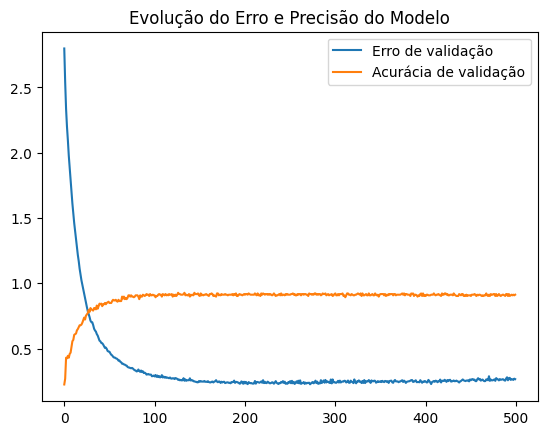

In [80]:
# Gráfico para visualizar os erros e a precisão
hitsorico.history.keys()
plt.plot(hitsorico.history['val_loss'])
plt.plot(hitsorico.history['val_accuracy'])
plt.legend(["Erro de validação", "Acurácia de validação"])
plt.title("Evolução do Erro e Precisão do Modelo")

In [81]:
# Armazenamento das previsões  
previsoes_rede = rede_neural.predict(x_teste_rede)
previsoes_rede

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[2.0808661e-09, 7.0084296e-02, 1.2282375e-08, ..., 4.7741922e-09,
        1.2362072e-08, 2.8327587e-11],
       [2.3877196e-22, 1.5576637e-24, 1.2029958e-14, ..., 2.8913578e-14,
        2.9020746e-15, 1.0570162e-16],
       [6.6896770e-05, 6.8136529e-15, 2.2641804e-12, ..., 1.2657196e-13,
        1.3217141e-10, 1.8918259e-12],
       ...,
       [4.0550274e-10, 3.7051109e-10, 7.7882985e-16, ..., 8.4150833e-14,
        9.9999535e-01, 2.5997034e-12],
       [5.7078722e-08, 3.0323822e-08, 3.6561630e-07, ..., 5.5513789e-09,
        1.1644864e-06, 5.4320094e-07],
       [2.5259696e-13, 1.5479137e-16, 2.3019254e-07, ..., 7.9879789e-15,
        6.0818024e-08, 6.6931349e-08]], dtype=float32)

In [82]:
# Gera a matriz de confusão 
# Transposição 
y_teste_matriz = [np.argmax(t) for t in y_teste_rede]
# Armazena o maior valor, já que estamos lidando com dados probabilisticos
y_previsoes_matriz = [np.argmax(t) for t in previsoes_rede]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,
         0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  1,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  1,  0,  3,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0

In [ ]:
# O modelo de rede neural apresentou uma boa acurácia 94% no entanto Random Forest demonstrou a melhor solução para o problema